## Predicting Housing Prices Using Regression Techniques from the Iowa Dataset and Decision Tree Methods for Model Training and Prediction

### This project aims at using the 79 features/variables provided to predict House prices to describe in depth several aspects of residential homes in Iowa, USA.

### Workflow

### Data Provided
- train.csv: This is the training set
- test.csv: This is the test set
- data_description.txt: Full description of each column
- sample_submission.csv: Benchmark submission from a linear regression model

In [560]:
#Importing all the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

###  Preparation of Data

In [561]:
#Loading the datasets 

trainset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')

In [562]:
#Getting the dimensions of the data in each dataset
print(trainset.shape)
print('\n', testset.shape) # Print testset in a newline

(1460, 81)

 (1459, 80)


In [563]:
# Obtaining per column information 
print(trainset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### Those columns in the train data that do not contain 1460 entries, contain missing values.

In [564]:
# Getting the column information for the test data
print(testset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

#### Those columns in the train data that do not contain 1459 entries, contain missing values.

### Exploratory Data Analysis (EDA)

In [565]:
#Randomly obtaining 10 samples of the trainset
trainset.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
894,895,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118858
672,673,20,RL,NaN,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,Gd,TA,CBlock,Gd,TA,No,ALQ,767,Unf,0,441,1208,GasA,TA,Y,SBrkr,1208,0,0,1208,1,0,1,1,3,1,TA,6,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,198,42,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,165000
414,415,60,RL,59.0,11228,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1993,1993,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,BLQ,50,GLQ,531,499,1080,GasA,Ex,Y,SBrkr,1080,1017,0,2097,0,1,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1993.0,Unf,3,678,TA,TA,Y,196,187,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,228000
509,510,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1959,1959,Gable,CompShg,MetalSd,MetalSd,BrkFace,132.0,TA,TA,CBlock,TA,TA,No,ALQ,991,Unf,0,50,1041,GasA,Ex,Y,SBrkr,1041,0,0,1041,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,1,270,TA,TA,Y,224,88,0,0,0,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal,124500
1250,1251,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065,Unf,0,1045,2110,GasA,Ex,Y,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2,522,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
1281,1282,20,RL,50.0,8049,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Timber,Norm,Norm,1Fam,1Story,7,5,1990,1990,Hip,CompShg,HdBoard,HdBoard,BrkFace,54.0,TA,TA,CBlock,Gd,TA,No,ALQ,1053,Unf,0,256,1309,GasA,TA,Y,SBrkr,1339,0,0,1339,1,0,2,0,2,1,TA,6,Typ,1,TA,Attchd,1990.0,Fin,2,484,Gd,Gd,Y,0,58,0,0,90,0,NaN,NaN,NaN,0,7,2006,WD,Normal,180000
1322,1323,60,RL,107.0,10186,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,674,Unf,0,76,750,GasA,Ex,Y,SBrkr,1061,862,0,1923,1,0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1992.0,RFn,2,564,TA,TA,Y,240,39,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,190000
443,444,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,WdShing,Wd Shng,BrkFace,72.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1258,1258,GasA,Ex,Y,SBrkr,1258,0,0,1258,0,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2007.0,Fin,3,648,TA,TA,Y,144,16,0,0,0,0,NaN,NaN,NaN,0,6,2007,New,Partial,172500
1362,1363,50,RL,NaN,12513,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NAmes,Feedr,Norm,1Fam,1.5Fin,4,4,1920,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,BrkTil,TA,Fa,No,Unf,0,Unf,0,715,715,GasA,Gd,Y,SBrkr,1281,457,0,1738,0,0,2,0,4,1,TA,7,Typ,1,Gd,Attchd,1920.0,Unf,1,368,TA,TA,Y,55,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,104900
468,469,20,RL,98.0,11428,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,248.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,

In [566]:
#Randomly obtaining 10 samples of the trainset
testset.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1449,2910,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,522.0,Unf,0.0,108.0,630.0,GasA,TA,Y,SBrkr,630,0,0,630,1.0,0.0,1,0,1,1,TA,3,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
221,1682,20,RL,129.0,16770,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2002,2003,Hip,CompShg,VinylSd,VinylSd,BrkFace,270.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1196.0,Unf,0.0,516.0,1712.0,GasA,Ex,Y,SBrkr,1712,0,0,1712,1.0,0.0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2002.0,RFn,3.0,701.0,TA,TA,Y,218,183,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal
467,1928,20,RL,83.0,13383,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1969,2000,Hip,CompShg,HdBoard,HdBoard,BrkFace,176.0,TA,TA,CBlock,TA,TA,No,BLQ,594.0,Unf,0.0,594.0,1188.0,GasA,Ex,Y,SBrkr,1404,0,0,1404,0.0,0.0,2,0,3,1,TA,7,Typ,1,Po,Attchd,1969.0,Unf,2.0,504.0,TA,TA,Y,0,16,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
450,1911,80,RL,NaN,13607,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,SLvl,6,6,1986,1986,Gable,CompShg,VinylSd,VinylSd,BrkFace,242.0,TA,Gd,CBlock,TA,TA,No,ALQ,454.0,Unf,0.0,118.0,572.0,GasA,Gd,Y,SBrkr,1182,800,0,1982,1.0,0.0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,1986.0,Fin,2.0,501.0,TA,TA,Y,400,112,0,0,0,0,NaN,NaN,Shed,1500,4,2009,WD,Normal
407,1868,20,RL,77.0,11422,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,352.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1359.0,Unf,0.0,479.0,1838.0,GasA,Ex,Y,SBrkr,1838,0,0,1838,1.0,0.0,2,0,3,1,Gd,7,Typ,2,Gd,Attchd,2007.0,RFn,2.0,524.0,TA,TA,Y,154,222,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal
838,2299,60,RL,99.0,13069,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,502.0,Gd,TA,PConc,Gd,TA,Av,Unf,0.0,Unf,0.0,1706.0,1706.0,GasA,Ex,Y,SBrkr,1718,1238,0,2956,0.0,0.0,2,1,5,1,Ex,11,Typ,1,Ex,BuiltIn,2004.0,RFn,3.0,916.0,TA,TA,Y,194,50,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
622,2083,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,5,6,1955,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,Mn,GLQ,370.0,Unf,0.0,398.0,768.0,GasA,Gd,Y,SBrkr,1024,564,0,1588,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1955.0,Unf,2.0,480.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal
394,1855,80,RL,66.0,19255,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,SLvl,6,5,1983,1983,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,100.0,Gd,TA,CBlock,Gd,TA,Av,Rec,70.0,GLQ,450.0,0.0,520.0,GasA,Gd,Y,SBrkr,1338,0,0,1338,0.0,0.0,1,1,2,1,Gd,5,Min2,1,Po,Attchd,1983.0,Unf,2.0,576.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,600,9,2009,WD,Normal
414,1875,20,RL,65.0,14753,Pave,NaN,IR2,Low,AllPub,Inside,Gtl,CollgCr,PosN,Norm,1Fam,1Story,7,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,950.0,Unf,0.0,513.0,1463.0,GasA,Ex,Y,SBrkr,1463,0,0,1463,1.0,0.0,2,0,3,1,TA,5,Typ,0,NaN,Attchd,1998.0,Fin,2.0,539.0,TA,TA,Y,0,81,0,0,0,0,NaN,GdPrv,NaN,0,12,2009,WD,Normal
74,1535,50,RM,69.0,11851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5

In [567]:
# Descriptive statistics of each of the numerical features for the trainset
pd.set_option('max_columns', 105)
trainset.describe(exclude = [np.object])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [568]:
# Descriptive statistics of each of the numerical features for the trainset
pd.set_option('max_columns', 105)
trainset.describe(exclude = [np.number])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [569]:
# Descriptive statistics of each of the numerical features for the trainset
pd.set_option('max_columns', 105)
trainset.describe(exclude = [np.object])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [570]:
# Descriptive statistics of each of the numerical features for the testset

pd.set_option('max_columns', 105)
testset.describe(exclude = [np.object])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [571]:
# Descriptive statistics of each of the non-numerical (objects) features for the testset
testset.describe(exclude = [np.number])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459,1459,1458,1458,1443,1459,1459,1459,1415,1414,1415,1417,1417,1459,1459,1459,1459,1458,1457,729,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,5,5,7,6,4,13,15,4,4,5,6,4,4,4,6,6,4,5,2,4,4,7,5,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,1444,1205,745,1169,1442,510,510,878,892,1256,661,634,1295,951,431,1237,1446,752,1358,1337,757,1357,364,853,625,1293,1328,1301,2,172,46,1258,1204


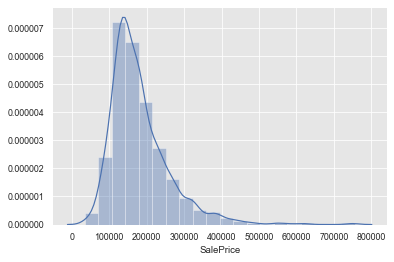

In [572]:
# Exploring the target/class variable to understand data skewness and kurtosis using seaborn
sns.set_context("paper")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
#Train data
sns.distplot(trainset['SalePrice'], bins = 20)

### **Skewness** and **Kurtosis** 
- Skewness is the measure of symmetry in a given dataset. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. A dataset that is heavy-tailed possesses high kurtosis. Our training dataset was highly skewed and for this reason, log transformation was done as a corrective measure.

In [573]:
#From the plot above it is correct to say that the test data is highly skewed
print("Skewness: %f" % trainset['SalePrice'].skew())
print("Kurtosis: %f" % trainset['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282




Skewness: 0.121335
Kurtosis: 0.809532


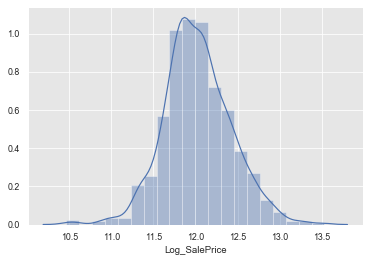

In [574]:
#Log Transformation and input to new variable 'Log_SalePrice'

trainset['Log_SalePrice'] = np.log(trainset['SalePrice'])

#Plotting the log transformed data
sns.distplot(trainset['Log_SalePrice'], bins = 20)
print('\n')
print("Skewness: %f" % trainset['Log_SalePrice'].skew())
print("Kurtosis: %f" % trainset['Log_SalePrice'].kurt())

- The data is now normally distributed

In [575]:
#Dropping the initial untransformed 'SalePrice' column

trainset = trainset.drop('SalePrice', axis = 1)

In [576]:
#Obtaining all the categorical columns as a list
print(trainset.dtypes[trainset.dtypes == 'object'].index, '\n')
print("Number of categorical columns: ", len(trainset.dtypes[trainset.dtypes == 'object'].index))


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object') 

Number of categorical columns:  43


In [577]:
#Obtaining all the numerical columns as a list

print(trainset.dtypes[trainset.dtypes != 'object'].index, '\n')
print("Number of numeric columns: ", len(trainset.dtypes[trainset.dtypes != 'object'].index))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Log_SalePrice'],
      dtype='object') 

Number of numeric columns:  38


In [578]:
#Getting a random sample of categorical columns
categorical = trainset.dtypes[trainset.dtypes == 'object'].index
trainset[categorical].sample(7)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
663,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,Av,BLQ,Rec,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
916,C (all),Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Gable,CompShg,AsbShng,AsbShng,None,TA,TA,CBlock,TA,TA,Av,BLQ,Unf,GasA,TA,N,FuseA,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
896,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,N,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1399,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,WdShing,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,Fa,TA,Y,NaN,MnPrv,NaN,WD,Normal
100,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,PConc,TA,TA,Mn,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
537,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,MnWw,NaN,COD,Normal
582,RL,Grvl,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,SFoyer,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,Gd,CBlock,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal


In [579]:
#Getting a random sample of numeric columns in a dataframe
numeric = trainset.dtypes[trainset.dtypes != 'object'].index
trainset[numeric].sample(7)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Log_SalePrice
1442,1443,60,85.0,11003,10,5,2008,2008,160.0,765,0,252,1017,1026,981,0,2007,1,0,2,1,3,1,10,1,2008.0,3,812,168,52,0,0,0,0,0,4,2009,12.644328
476,477,20,75.0,13125,6,5,1997,1998,215.0,994,0,484,1478,1493,0,0,1493,1,0,2,0,3,1,7,1,1997.0,2,508,140,39,0,0,0,0,0,4,2008,12.249611
157,158,60,92.0,12003,8,5,2009,2010,84.0,0,0,774,774,774,1194,0,1968,0,0,2,1,4,1,8,1,2009.0,3,680,0,75,0,0,0,0,0,5,2010,12.504324
672,673,20,NaN,11250,6,6,1977,1977,0.0,767,0,441,1208,1208,0,0,1208,1,0,1,1,3,1,6,1,1977.0,2,546,198,42,0,0,0,0,0,6,2006,12.013701
596,597,70,60.0,3600,6,7,1910,1993,0.0,0,0,684,684,684,684,0,1368,0,0,1,0,3,1,7,0,1930.0,1,216,0,158,0,0,0,0,0,10,2006,11.648365
274,275,20,76.0,8314,5,7,1982,1982,0.0,546,0,270,816,816,0,0,816,0,0,1,0,2,1,5,0,1982.0,1,264,168,0,0,0,0,0,0,6,2007,11.732061
1150,1151,20,57.0,8280,6,5,1950,1950,0.0,0,0,932,932,932,0,0,932,0,0,1,0,2,1,4,1,1950.0,1,306,0,0,214,0,0,0,0,11,2007,11.728037


In [580]:
#Obtaining the percentage of missing values in each column
total = trainset.isnull().sum().sort_values(ascending = False)
percent = (trainset.isnull().sum() / trainset.isnull().count()).sort_values(ascending = False)

data_missing = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
data_missing.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [581]:
#Replacing the NaN(Not a number) entries as some contain meaningful information.
#This is done for both the train and test data

filcol = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']
#the na columns are filled with none
for col in filcol:
    trainset[col].fillna('None', inplace = True)
    testset[col].fillna('None', inplace = True)

In [582]:
#  Function that replaces missing data and outputs a dataframe with the new percentages of missing values
def is_missing(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    
    is_missing = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    
    return is_missing.head(20)



In [583]:
# Printing out missing data from the trainset
is_missing(trainset)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Log_SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000


In [584]:
#Printing out the missing data from the trainset
is_missing(testset)

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
BsmtFullBath,2,0.001371
BsmtHalfBath,2,0.001371
BsmtFinSF2,1,0.000685
BsmtUnfSF,1,0.000685
TotalBsmtSF,1,0.000685
BsmtFinSF1,1,0.000685
GarageCars,1,0.000685


#### Imputing with Mean
- The remaining na values are imputed using the means of their specific columns. Imputing using the mean is preferred as it takes into account/factors in the entire sample size.
- However the variability is reduced and the standard deviations and variances tend to be underestimated

In [585]:
trainset.fillna(trainset.mean(), inplace = True)
testset.fillna(testset.mean(), inplace = True)

In [586]:
trainset.isnull().sum().sort_values(ascending = False).sum()

0

In [587]:
testset.isnull().sum().sort_values(ascending = False).sum()

0

In [588]:
#Printing a list of the numeric features
print(list(numeric))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Log_SalePrice']


In [589]:
#Looking at the skewness and kurtosis of other variables apart from the target variable
#This is better done using log values for each of these variables
for col in numeric:
    print('{:15}'.format(col),
         'Skewness: {:06.5f}'.format(trainset[col].skew()), '  ',
          
         'Kurtosis: {:06.5f}'.format(trainset[col].kurt()))


Id              Skewness: 0.00000    Kurtosis: -1.20000
MSSubClass      Skewness: 1.40766    Kurtosis: 1.58019
LotFrontage     Skewness: 2.38495    Kurtosis: 21.84817
LotArea         Skewness: 12.20769    Kurtosis: 203.24327
OverallQual     Skewness: 0.21694    Kurtosis: 0.09629
OverallCond     Skewness: 0.69307    Kurtosis: 1.10641
YearBuilt       Skewness: -0.61346    Kurtosis: -0.43955
YearRemodAdd    Skewness: -0.50356    Kurtosis: -1.27225
MasVnrArea      Skewness: 2.67641    Kurtosis: 10.15432
BsmtFinSF1      Skewness: 1.68550    Kurtosis: 11.11824
BsmtFinSF2      Skewness: 4.25526    Kurtosis: 20.11334
BsmtUnfSF       Skewness: 0.92027    Kurtosis: 0.47499
TotalBsmtSF     Skewness: 1.52425    Kurtosis: 13.25048
1stFlrSF        Skewness: 1.37676    Kurtosis: 5.74584
2ndFlrSF        Skewness: 0.81303    Kurtosis: -0.55346
LowQualFinSF    Skewness: 9.01134    Kurtosis: 83.23482
GrLivArea       Skewness: 1.36656    Kurtosis: 4.89512
BsmtFullBath    Skewness: 0.59607    Kurtosis: -0.

In [590]:
for df in [trainset, testset]:
    df['GrLivArea_Log'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace = True, axis = 1)
    df['LotArea_Log'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace = True, axis = 1)

In [591]:
print(trainset['LotArea_Log'].skew(), '\n',
      trainset['LotArea_Log'].kurt())

-0.1379938086958118 
 4.713358369108622


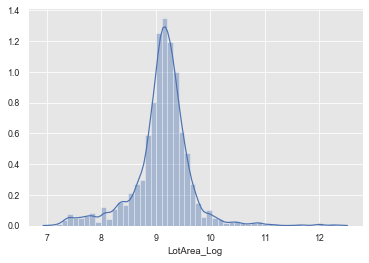

In [592]:
sns.distplot(trainset['LotArea_Log'])

In [593]:
#After the editions made to some of the variables
numeric = trainset.dtypes[trainset.dtypes != 'object'].index
trainset[numeric].head()

,Id,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Log_SalePrice,GrLivArea_Log,LotArea_Log
0,1,60,65.0,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694,7.444249,9.041922
1,2,20,80.0,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011,7.140453,9.169518
2,3,60,68.0,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167,7.487734,9.328123
3,4,70,60.0,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398,7.448334,9.164296
4,5,60,84.0,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216,7.695303,9.565214


#### Visualizing the Relationships between Two Features
- regplot is used in the visualization of two features' relationships in the given dataset i.e. the relations between different features and the target feature in this case 'SalePrice_log'

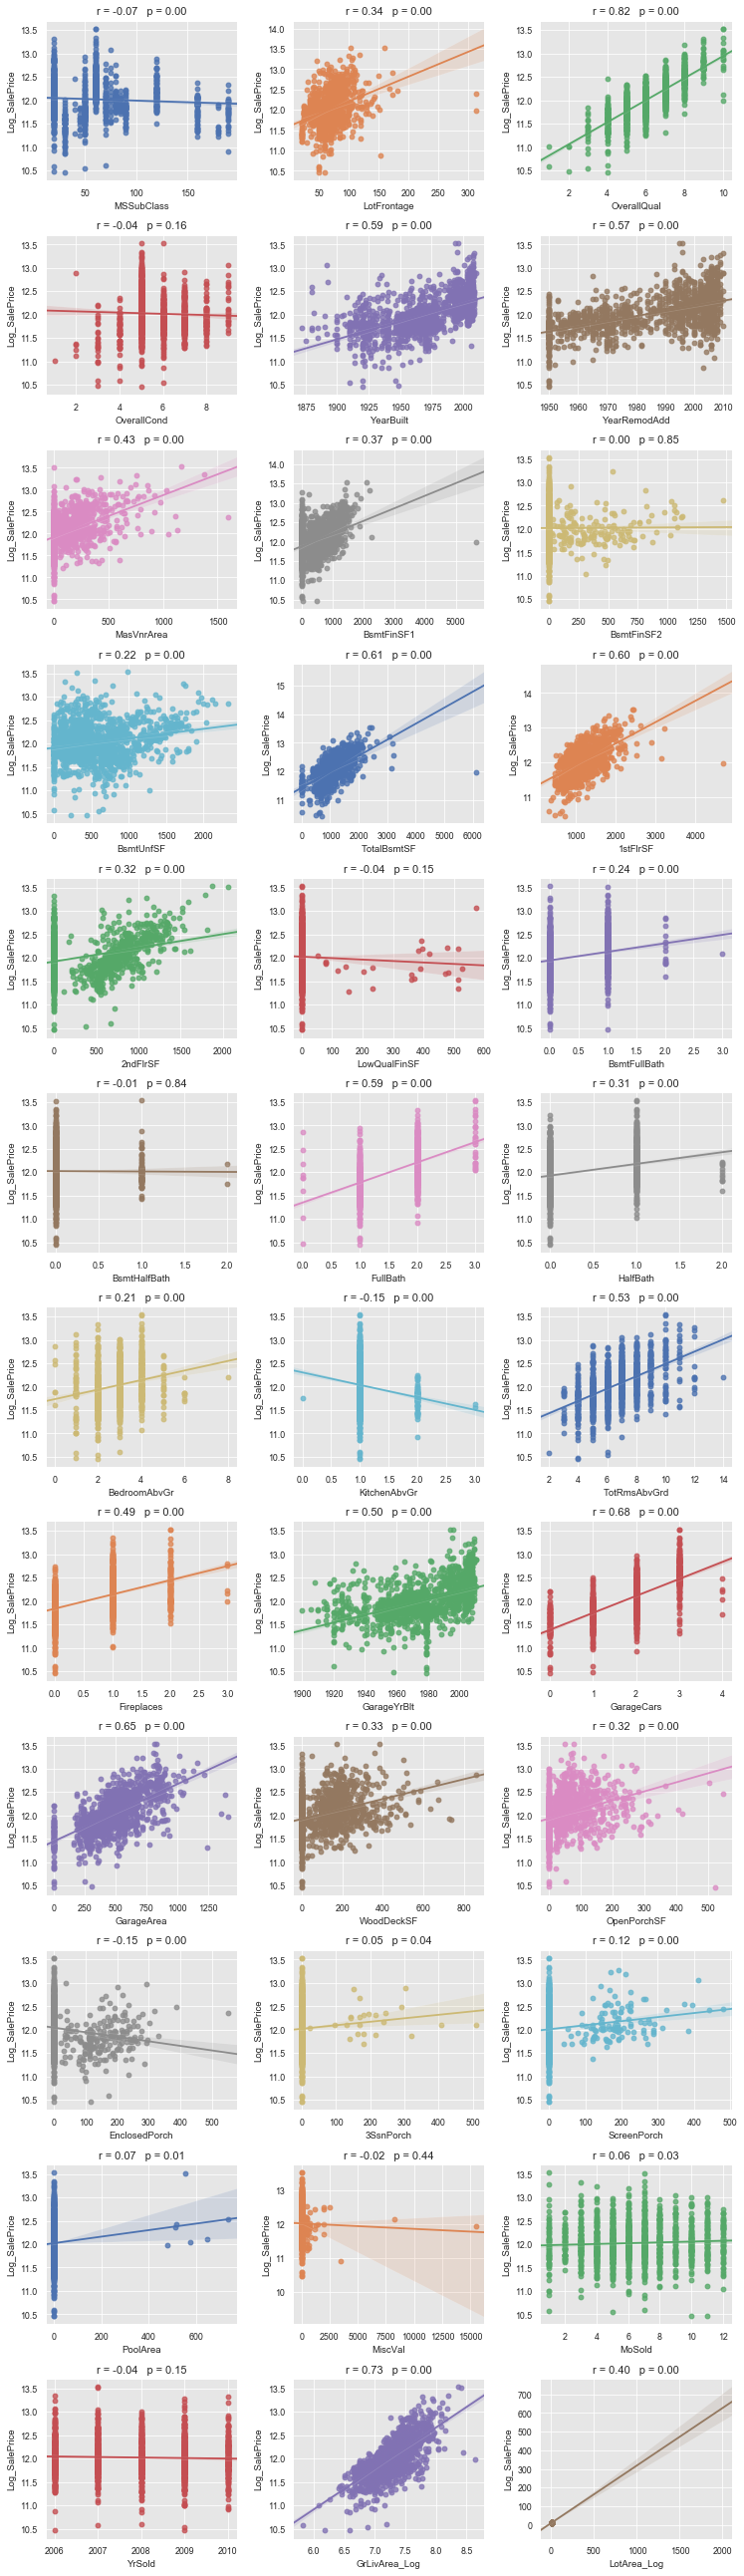

In [594]:
#Plotting for the visualization of relationships between a few selected features and the target feature
row = 12
col = 3

fig, axs = plt.subplots(12, 3, figsize = (col*3.5, row*3))

feats = list(numeric)
not_plot = ['Id', 'SalePrice', 'Log_SalePrice']
featsplot = [c for c in list(numeric) if c not in not_plot]

for r in range(0, row):
    for c in range(0, col):
        i = r*col+c
        if i < len(featsplot):
            sns.regplot(trainset[featsplot[i]], trainset['Log_SalePrice'], ax = axs[r][c])
            
            statp = stats.pearsonr(trainset[featsplot[i]], trainset['Log_SalePrice'])
#statp returns float figures, the p- value and the correlation coefficient (r).
# The correlation coefficient (r), measures the linear relationships between features under observation.

            str_title = 'r = ' + '{0:.2f}'.format(statp[0]) + '   ' 'p = ' + '{0:.2f}'.format(statp[1])
            axs[r][c].set_title(str_title, fontsize = 11)
            
plt.tight_layout()
plt.show()

In [595]:
trainset['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

#### Dealing with Outliers
- Another important step was to check for outliers. This can be done by analyzing  the most important indicators for sale price: Ground Living Area and Overall Quality. This allowed me to identify two outliers which were then eliminated from the data set:

In [596]:
#Dropping Outliers 'OverallQual' feature

trainset = trainset.drop(trainset[(trainset['OverallQual'] == 10) & (trainset['Log_SalePrice']<12.3)].index)

In [597]:
#Dropping outliers in the 'GrLivArea_Log' feature

trainset = trainset.drop(trainset[(trainset['GrLivArea_Log']>8.3) & (trainset['Log_SalePrice']<12.5)].index)

In [598]:
#To check the dimensions of the trainset dataframe
trainset.shape

(1458, 81)

### Correlation
- Correlation refers to the relationship between two variables and how they affect or may not affect the change in each other. This is normaly done using the Pearsons's correlation coefficient. This method assumes a normal distribution between the attributes involved. In this case the correlation of these variables is calculated against the target variable.

In [599]:
#calculation of the correlation coefficient with respect to target feature

cor = trainset.corr()
cor_abs = cor.abs()
target = 'Log_SalePrice'
#To return the n number of rows, ordered by the columns with the largest correlation values in descending order
num_ft = len(numeric)
c_ord = cor_abs.nlargest(num_ft, target)[target] 
print(c_ord)

Log_SalePrice    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
LotArea_Log      0.402814
BsmtFinSF1       0.392283
LotFrontage      0.352432
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
PoolArea         0.074338
MSSubClass       0.073969
MoSold           0.057064
3SsnPorch        0.054914
LowQualFinSF     0.037951
YrSold           0.037151
OverallCond      0.036821
MiscVal          0.020012
Id               0.017774
BsmtHalfBath     0.005124
BsmtFinSF2       0.004863
Name: Log_Sa

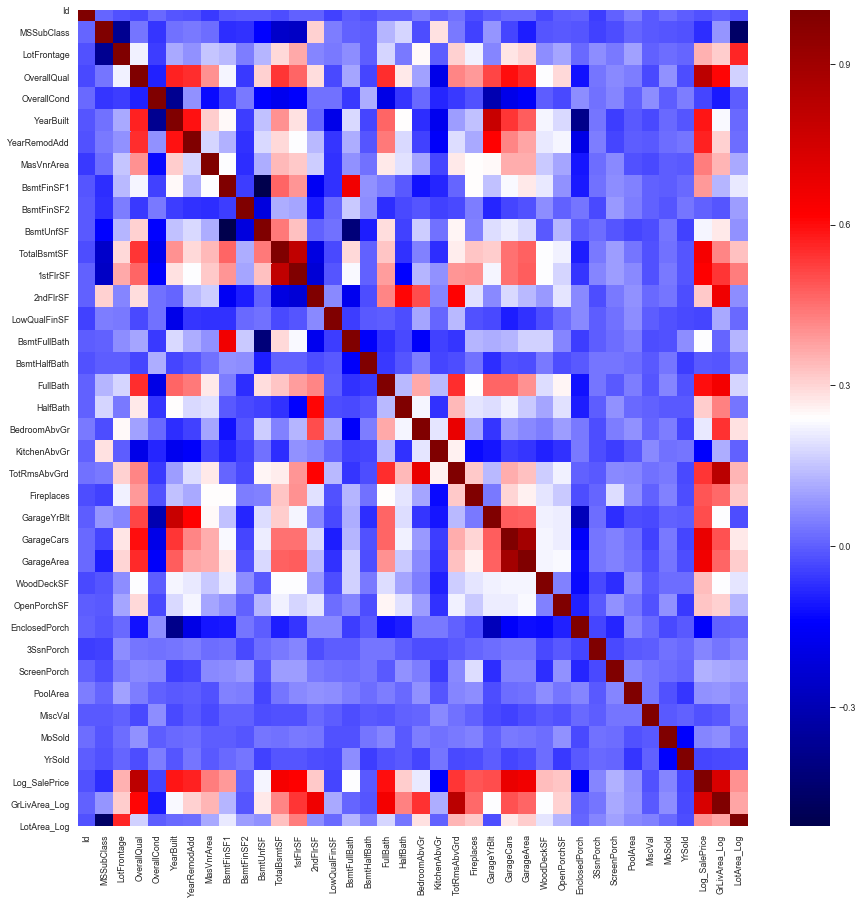

In [600]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(trainset.corr(method='pearson'),cmap='seismic')

In [601]:
#Setting a minimum correlation threshold of 0.5
mincorval = 0.5

above_thresh = list(c_ord[c_ord.values > mincorval].index)
print(above_thresh)

['Log_SalePrice', 'OverallQual', 'GrLivArea_Log', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt']


In [602]:
#Printing out all the columns with a correlation values below set threshold in a list
below_thresh = list(c_ord[c_ord.values < mincorval].index)
print(below_thresh)

['Fireplaces', 'MasVnrArea', 'LotArea_Log', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MiscVal', 'Id', 'BsmtHalfBath', 'BsmtFinSF2']


### The correlation between the categorical variables and the target variable

In [603]:
print(list(categorical))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [604]:
#Printing the value counts in each of the categorical variable columns

for cat in list(categorical):
    print(trainset[cat].value_counts(), '\n', '_'*25) #Printing the output in a newline


RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 
 _________________________
Pave    1452
Grvl       6
Name: Street, dtype: int64 
 _________________________
None    1367
Grvl      50
Pave      41
Name: Alley, dtype: int64 
 _________________________
Reg    925
IR1    483
IR2     41
IR3      9
Name: LotShape, dtype: int64 
 _________________________
Lvl    1311
Bnk      61
HLS      50
Low      36
Name: LandContour, dtype: int64 
 _________________________
AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64 
 _________________________
Inside     1051
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 
 _________________________
Gtl    1380
Mod      65
Sev      13
Name: LandSlope, dtype: int64 
 _________________________
NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide   

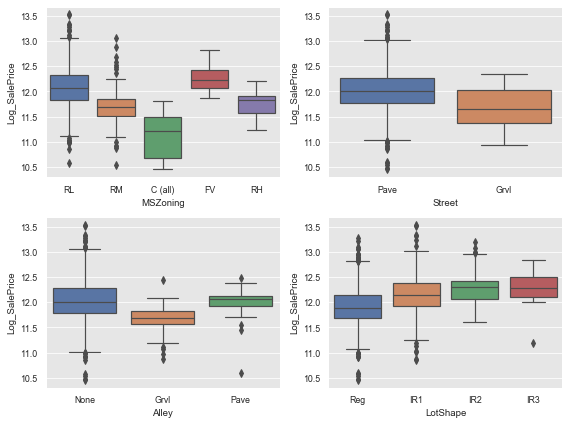

In [605]:
#Relationsship to the target feature:SalePrice_Log in a boxplot

categ_list = list(categorical)
n_rows = 2
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*4, n_rows*3))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols+c
        if i < len(categ_list):
            sns.boxplot(x = categ_list[i], y = target, data = trainset, ax = axs[r][c])
            
plt.tight_layout()

- Based on the significant observable variations in the boxplots, the categorical variables(features) with a strong correlation with subject to the target (variable) feature are selected.

In [606]:
categ_strongcorr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

In [607]:
categ_weakcorr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'GarageCond',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'Condition1', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

In [608]:
# Creating a function that plots heatmap of each of the numeric features with a correlation greater than the threshold value of 0.5 to the target feature.

def plot_corr_matrix(dat_f, nr_c, targvar) :
    
    cor = dat_f.corr()
    cor_abs = cor.abs()
    cols = cor_abs.nlargest(nr_c, targvar)[targvar].index
    cm = np.corrcoef(df[cols].values.T)
    
    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )

In [609]:
above_thresh

['Log_SalePrice',
 'OverallQual',
 'GrLivArea_Log',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageYrBlt']

In [610]:
above_thresh = ['Log_SalePrice',
 'OverallQual',
 'GrLivArea_Log',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageYrBlt']
above_thresh[0]
#len_above = len(above_thresh)

#plot_corr_matrix(trainset, len_above, target)

'Log_SalePrice'

### Data Transformation/Wrangling
- To enable easier data manipulation it is normally recommended to transform data and map it from one form to another to create uniformity and make it more appropriate for analytical purposes. This is done in both the train and the test data to ensure that uniformity is upheld.



In [611]:
#Dropping the first column Id from the testset dataframe
id_test = testset['Id'] 

to_drop_num  = below_thresh
to_drop_catg = categ_weakcorr

dropcols = to_drop_num + to_drop_catg 

for df in [trainset, testset]:
    df.drop(dropcols, inplace= True, axis = 1)

In [612]:
print(below_thresh)

['Fireplaces', 'MasVnrArea', 'LotArea_Log', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MiscVal', 'Id', 'BsmtHalfBath', 'BsmtFinSF2']


In [613]:
#Obtaining the new dimensions of the dataframe
testset.shape

(1459, 21)

In [614]:
#The Neighborhood feature was removed to be plotted separately
categ_st = categ_strongcorr.copy()
categ_st.remove('Neighborhood')

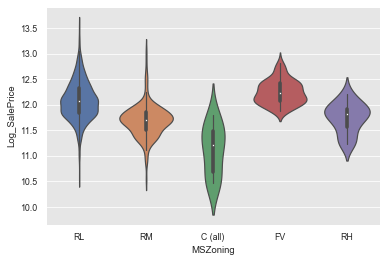

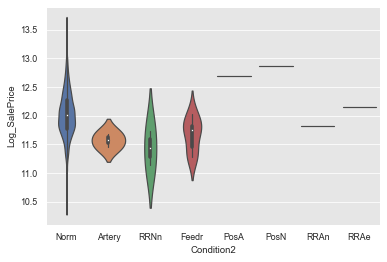

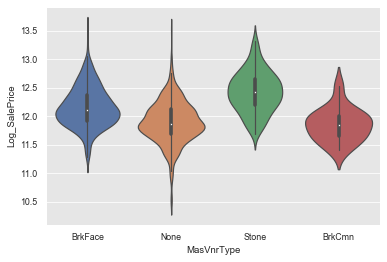

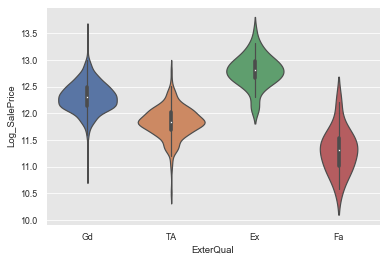

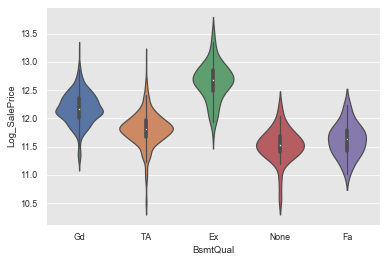

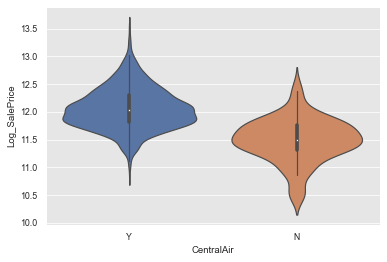

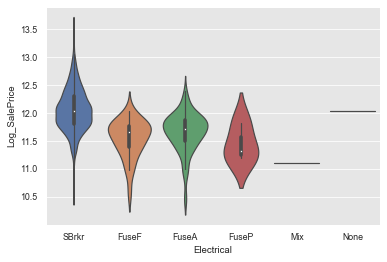

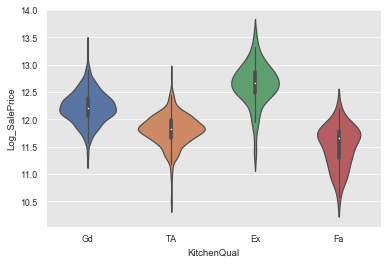

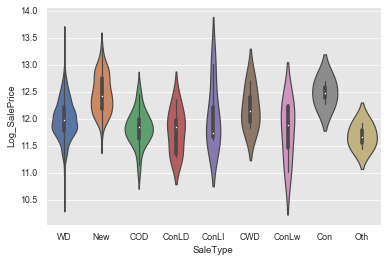

In [615]:
for cat in categ_st:
    sns.violinplot(x=cat, y=target, data = trainset)
    plt.show()

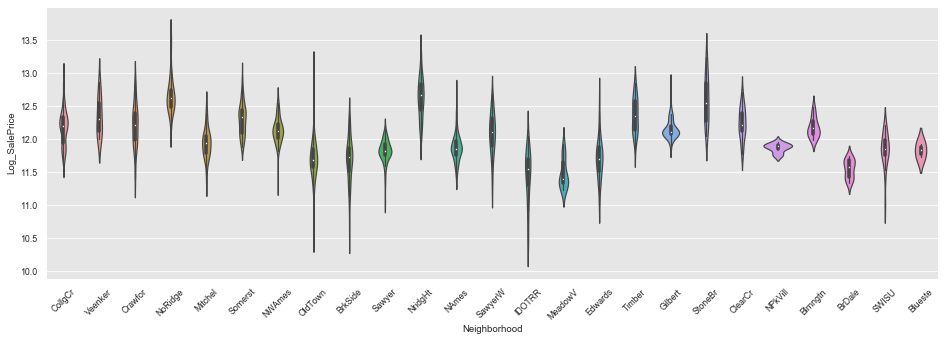

In [616]:
# Violinplot plotting the neighborhood variable against the target variable 
plt.figure(figsize = (16,5))

sns.violinplot(x= 'Neighborhood', y = target, data = trainset)
plt.xticks(rotation = 45)
plt.show()


In [617]:
#Printing the list containing the names of the remaining categorical string variables
print(categ_st)

['MSZoning', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType']


In [618]:
#To obtain the mean Saleprice unique values for each of the categorical columns in the categorical columns including neighborhood column
print(trainset.groupby('Neighborhood')[target].mean())

Neighborhood
Blmngtn    12.169416
Blueste    11.826536
BrDale     11.547864
BrkSide    11.679727
ClearCr    12.239900
CollgCr    12.163641
Crawfor    12.206659
Edwards    11.705322
Gilbert    12.155803
IDOTRR     11.446889
MeadowV    11.474522
Mitchel    11.933948
NAmes      11.868045
NPkVill    11.866477
NWAmes     12.130609
NoRidge    12.676000
NridgHt    12.619411
OldTown    11.703865
SWISU      11.838435
Sawyer     11.811468
SawyerW    12.090689
Somerst    12.296495
StoneBr    12.585486
Timber     12.363455
Veenker    12.344176
Name: Log_SalePrice, dtype: float64


In [619]:
# Mean values for the unique entries in the other categorical values
for cat in categ_st:
    print(trainset.groupby(cat)[target].mean(), '\n', '\n', '_'*25)

MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085939
RM         11.692893
Name: Log_SalePrice, dtype: float64 
 
 _________________________
Condition2
Artery    11.570036
Feedr     11.670631
Norm      12.025925
PosA      12.691580
PosN      12.860999
RRAe      12.154779
RRAn      11.827043
RRNn      11.435329
Name: Log_SalePrice, dtype: float64 
 
 _________________________
MasVnrType
BrkCmn     11.853239
BrkFace    12.163630
None       11.896884
Stone      12.431016
Name: Log_SalePrice, dtype: float64 
 
 _________________________
ExterQual
Ex    12.792412
Fa    11.304541
Gd    12.311282
TA    11.837985
Name: Log_SalePrice, dtype: float64 
 
 _________________________
BsmtQual
Ex      12.650235
Fa      11.617600
Gd      12.179882
None    11.529680
TA      11.810855
Name: Log_SalePrice, dtype: float64 
 
 _________________________
CentralAir
N    11.491858
Y    12.061099
Name: Log_SalePrice, dtype: float64 
 
 _________________________
Electrical

- To transform the unique values in the categorical variables, it is first necessary to classify them. This is done based on the means computed above asshown below.

In [620]:
#Classifying the unique values in the categorical variables based on the computed means

# Neighborhood
nh_categ2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nh_categ3 = ['NoRidge', 'NridgHt', 'StoneBr']

## 'MSZoning'
msz_categ2 = ['RM', 'RH']
msz_categ3 = ['RL', 'FV'] 

# Condition2
con2_categ2 = ['Norm', 'RRAe']
con2_categ3 = ['PosA', 'PosN'] 

# SaleType
ST_categ1 = ['Oth']
ST_categ3 = ['CWD']
ST_categ4 = ['New', 'Con']



In [621]:
# Converting the categorical variables to numeric columns in the trainset and testset
# This is done by outputting them in separate columns.

for df in [trainset, testset]:
    
    df['msz_num'] = 1  
    df.loc[(df['MSZoning'].isin(msz_categ2) ), 'msz_num'] = 2    
    df.loc[(df['MSZoning'].isin(msz_categ3) ), 'msz_num'] = 3        
    
    df['nh_num'] = 1       
    df.loc[(df['Neighborhood'].isin(nh_categ2) ), 'nh_num'] = 2    
    df.loc[(df['Neighborhood'].isin(nh_categ3) ), 'nh_num'] = 3    

    df['cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(con2_categ2) ), 'cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(con2_categ3) ), 'cond2_num'] = 3    
    
    df['mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 
    
    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['st_num'] = 2       
    df.loc[(df['SaleType'].isin(ST_categ1) ), 'st_num'] = 1  
    df.loc[(df['SaleType'].isin(ST_categ3) ), 'st_num'] = 3  
    df.loc[(df['SaleType'].isin(ST_categ4) ), 'st_num'] = 4

- The correlaton of the new columns created with respect to the target variable are shown below.

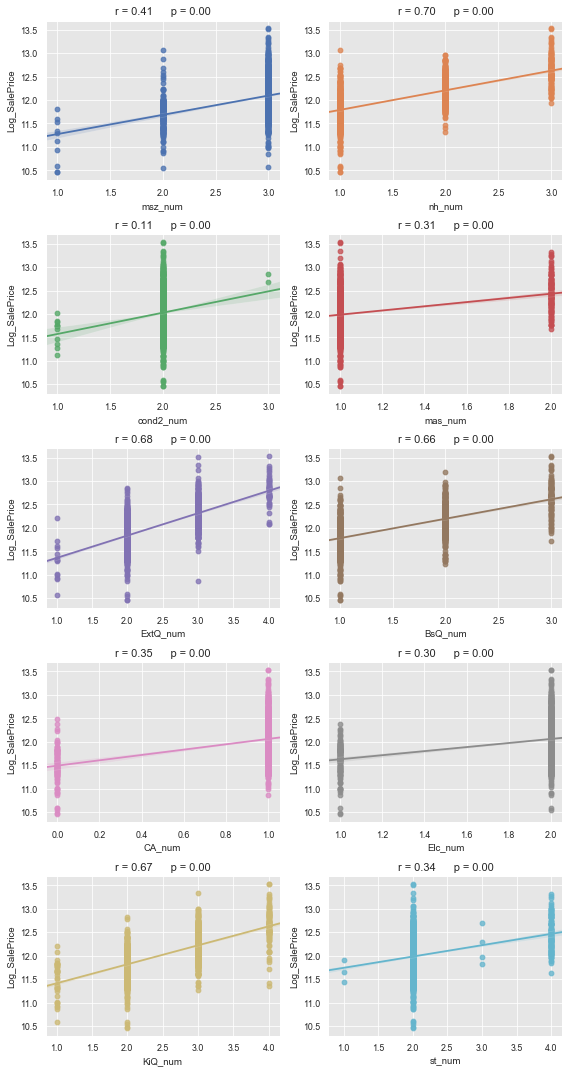

In [622]:
#correlation of the new numerical columns to the Log_SalePrice

new_col_num = ['msz_num', 'nh_num', 'cond2_num', 'mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'st_num']

nr_rows = 5
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))
plt.subplots_adjust(bottom=1,right=2, top=3)

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(new_col_num):
            sns.regplot(trainset[new_col_num[i]], trainset[target], ax = axs[r][c])
            stp = stats.pearsonr(trainset[new_col_num[i]], trainset[target])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)

plt.tight_layout()    
plt.show()
           

In [623]:
# This can be output as shown below:
corev = trainset.corr()
cor_abs = corev.abs()

allcols = len(trainset)
ser_corr_1 = cor_abs.nlargest(allcols, target)[target]
print(ser_corr_1)

Log_SalePrice    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
nh_num           0.696962
ExtQ_num         0.682225
GarageCars       0.681033
KiQ_num          0.669989
BsQ_num          0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
msz_num          0.409423
CA_num           0.351598
st_num           0.337469
mas_num          0.313280
Elc_num          0.304857
cond2_num        0.107610
Name: Log_SalePrice, dtype: float64


- From the results obtained above, the categorical columns and the new numeric columns which have less than a threshold coefficient of (0.5)

In [624]:
#Dropping variables that do not meet the threshold coefficient for both the trainset and testset

cat_colsdrop = ['Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']
cols_below_corr = list(ser_corr_1[ser_corr_1.values <= mincorval].index)


for df in [trainset, testset] :
    df.drop(cat_colsdrop, inplace= True, axis = 1)
    df.drop(cols_below_corr, inplace= True, axis = 1)

- Obtaining the edited/ modified columns in terms of their correlation to the target variable 

In [625]:
#Variables from the modified trainset dataframe
corr2 = trainset.corr()
corr_abs_2 = corr2.abs()

all_cols = len(trainset)
ser_corr_2 = corr_abs_2.nlargest(all_cols, target)[target]

print(ser_corr_2)

Log_SalePrice    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
nh_num           0.696962
ExtQ_num         0.682225
GarageCars       0.681033
KiQ_num          0.669989
BsQ_num          0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Name: Log_SalePrice, dtype: float64


In [626]:
def plot_corr_matrix(df, nr_c, targ) :
    
    cor = df.corr()
    cor_abs = cor.abs()
    cols = cor_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)
    
    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )

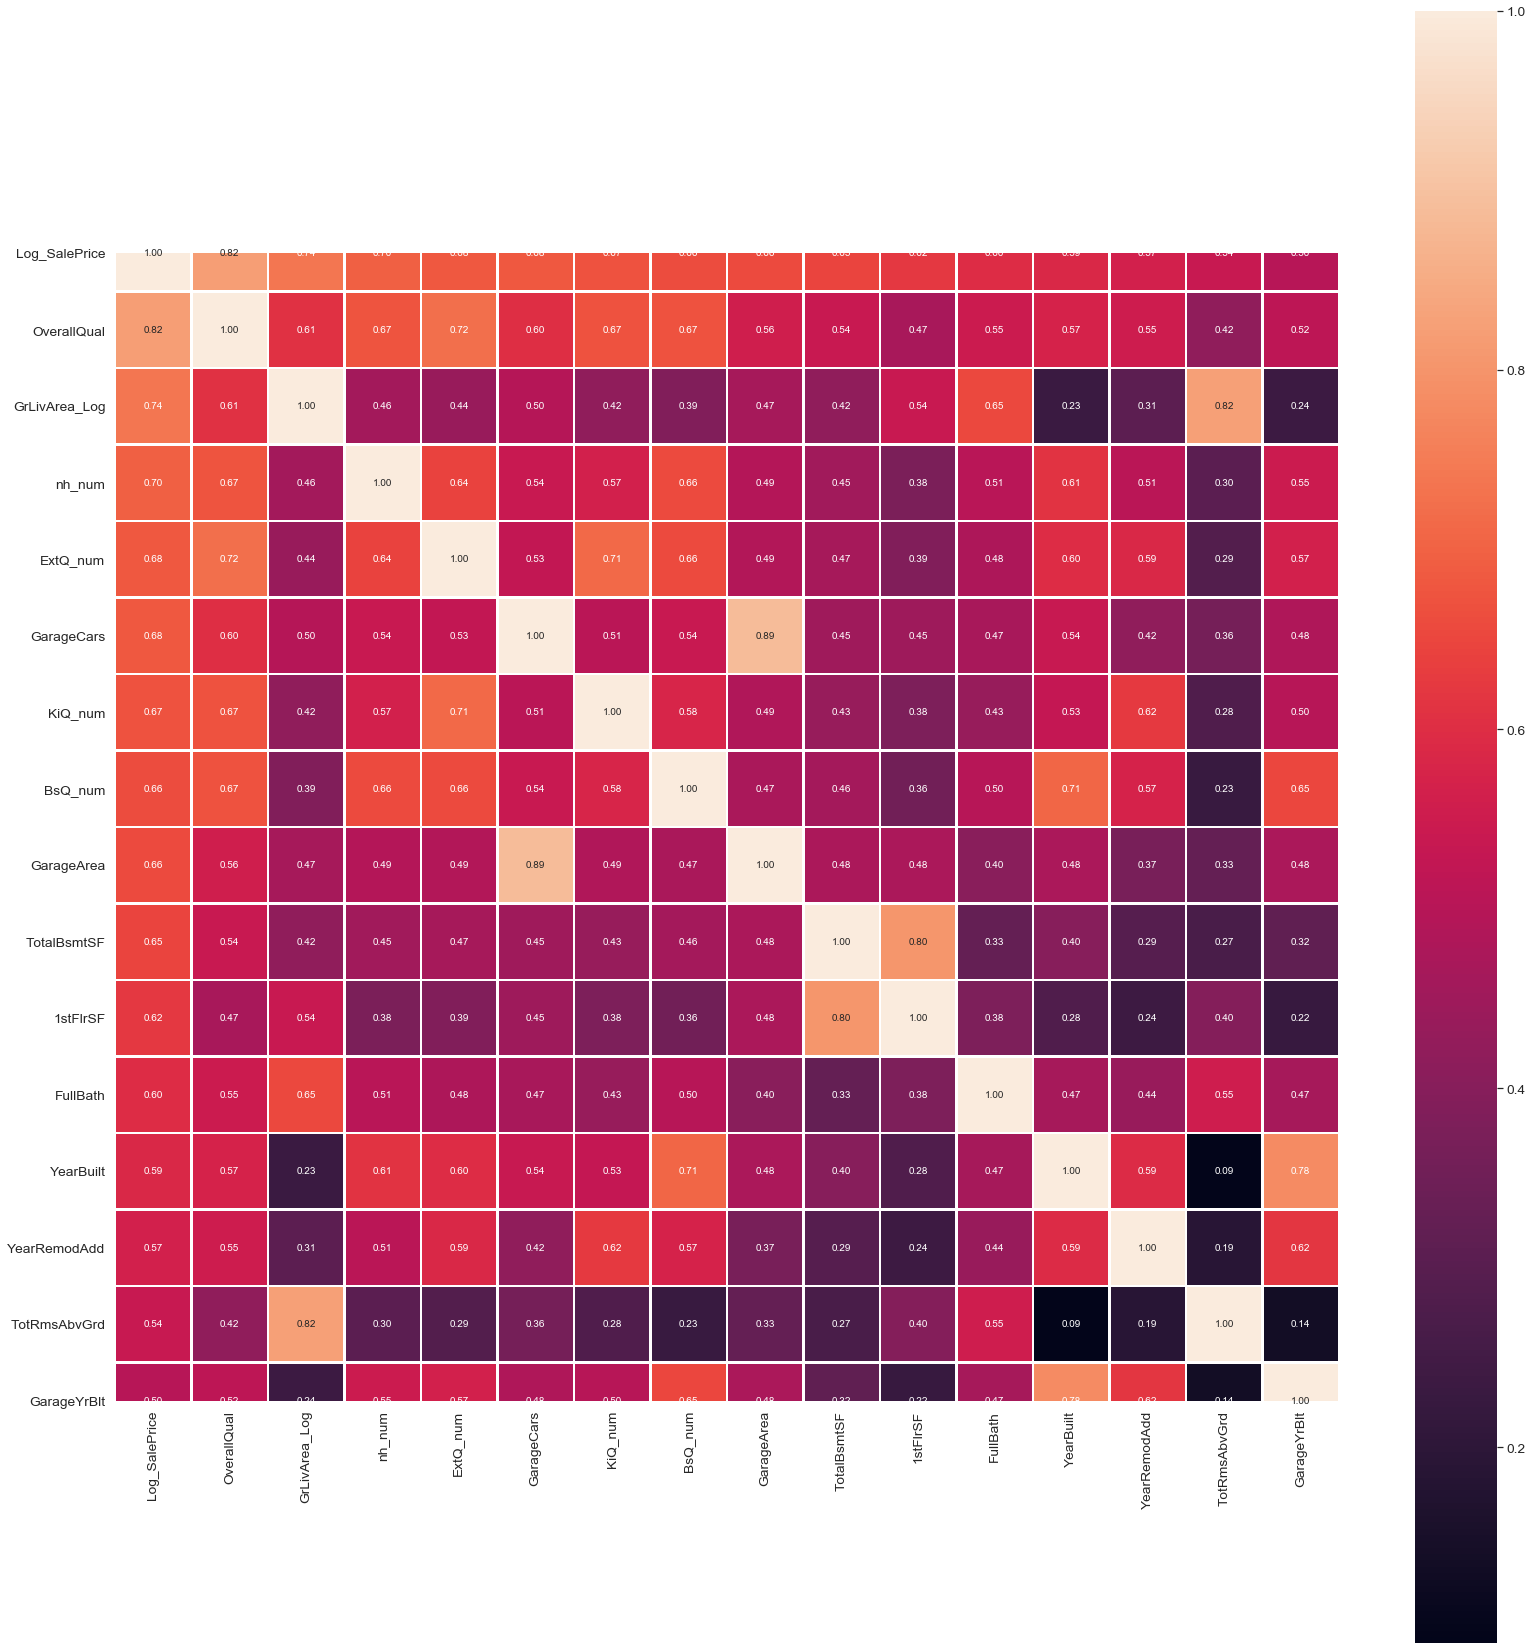

In [627]:
no_feats=len(trainset.columns)
plot_corr_matrix(trainset, no_feats, target)
plt.subplots_adjust(bottom=1,right=2, top=3)


### Multicolinearity
- To reduce more features, the plot obtained above can be used to check for features that have a high correlation coefficient to one another, above 0.8.
- The metric for dropping such features will be restricted to those that have multicolinearity but have low correlation with the target variable.

In [638]:
cols = list(trainset.columns)
colte = list(testset.columns) 
print(cols)

['MSZoning', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'Log_SalePrice', 'GrLivArea_Log', 'nh_num', 'ExtQ_num', 'BsQ_num', 'KiQ_num']


In [639]:
#List for the testset
print(colte)

['MSZoning', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GrLivArea_Log', 'nh_num', 'ExtQ_num', 'BsQ_num', 'KiQ_num']


In [629]:
#Dropping columns with high colinearity but low correlation with target variable as well as the target variable

for col in ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt', 'SalePrice_Log']:
    if col in cols:
        cols.remove(col)
print(cols)

['MSZoning', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'FullBath', 'GarageCars', 'Log_SalePrice', 'GrLivArea_Log', 'nh_num', 'ExtQ_num', 'BsQ_num', 'KiQ_num']


In [640]:
features = cols.copy()
feats= colte.copy()

In [641]:
#To index the Log_SalePrice from the testset as the index, a new variable is created
v = list(set(feats) - set('Log_SalePrice'))
v

['GarageCars',
 'GrLivArea_Log',
 'BsQ_num',
 'YearRemodAdd',
 'TotalBsmtSF',
 'MSZoning',
 'GarageArea',
 '1stFlrSF',
 'YearBuilt',
 'nh_num',
 'ExtQ_num',
 'TotRmsAbvGrd',
 'FullBath',
 'OverallQual',
 'GarageYrBlt',
 'KiQ_num']

In [643]:
traindf = trainset[features].copy()
testdf = testset[v].copy()

y = trainset[target]


In [644]:
traindf = traindf.drop('MSZoning', axis = 1)
testdf = testdf.drop('MSZoning', axis = 1)

In [645]:
traindf.sample(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,Log_SalePrice,GrLivArea_Log,nh_num,ExtQ_num,BsQ_num,KiQ_num
905,5,1954,1954,1056,1063,1,6,1954.0,1,280,11.759786,6.968850,1,2,1,2
137,7,1988,1989,1907,1959,3,9,1989.0,3,766,12.049419,7.580189,1,2,1,2
917,4,1956,1956,1134,1229,1,6,1956.0,1,284,11.813030,7.113956,1,2,1,2
449,3,1948,2002,649,679,1,6,1981.0,1,308,11.695247,7.075809,1,2,1,2
21,7,1930,1950,637,1108,1,6,1930.0,1,280,11.845103,7.010312,1,2,1,3


### Data Preprocessing
- This involves the data normalization and standardization procedures. The function used to carry out this function is sklearn.preprocessing.StandardScaler() function() and it does this by removing the mean and scaling to unit variance. It transforms data in such a way that its distribution will have a mean value of 0 and a standard deviation of 1.  


In [646]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
traindf_sc = sc.fit_transform(traindf)
testdf_sc = sc.transform(testdf)

ValueError: operands could not be broadcast together with shapes (1459,15) (16,) (1459,15) 